In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import numpy.random as rnd
import pandas as pd
import seaborn as sns

### Ex1: 

In [2]:
# Create random 2d data
m = np.array([10,13])
s = np.array([[3.5, -1.8], [-1.8,3.5]])

# Create 100 samples using mean and sigma
x = rnd.multivariate_normal(m, s, size=(100))

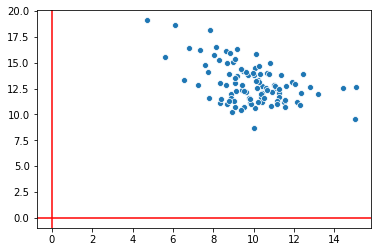

In [3]:
plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(x[:,0], x[:,1])
plt.show()

In [4]:
mean = np.mean(x, axis= 0)
mean_dt = x - mean

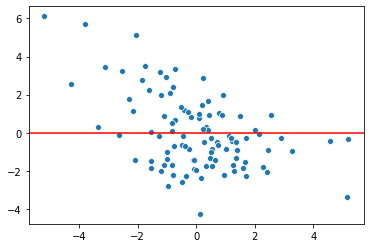

In [5]:
### plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(x=mean_dt[:,0], y=mean_dt[:,1])
plt.show()

In [6]:
cov = np.cov(x.T) / x.shape[0]

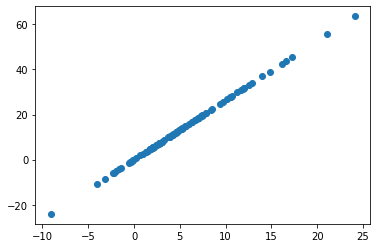

In [7]:
x=np.cov(x)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [8]:
eig_val, eig_vec = np.linalg.eig(cov)

In [9]:
sorted_index = eig_val.argsort()[::-1]
eig_val = eig_val[sorted_index]
eig_vec = eig_vec[:,sorted_index]

In [10]:
n_components = 2
pca_data = mean_dt.dot(eig_vec[:, :n_components])

### Ex2: 

In [11]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
def PCA(X , num_components):
    #Step-1
    X_meaned = np.mean(X , axis = 0) - X
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [13]:
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_data = pd.DataFrame(mat_reduced , columns = ['principal component 1','principal component 2'])
 
#Concat it with target variable to create a complete Dataset
principal_data = pd.concat([principal_data , pd.DataFrame(target)] , axis = 1)

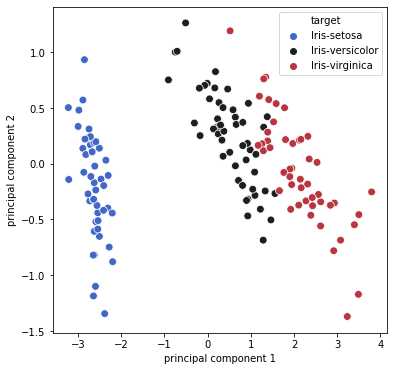

In [14]:
plt.figure(figsize = (6, 6))
sb.scatterplot(data = principal_data , x = 'principal component 1',y = 'principal component 2' , hue = 'target' , s = 60, palette= 'icefire')

### Ex3: 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal = pca.fit_transform(x)
principal_data = pd.DataFrame(principal , columns = ['principal component 1','principal component 2'])
principal_data = pd.concat([principal_data , pd.DataFrame(target)] , axis = 1)

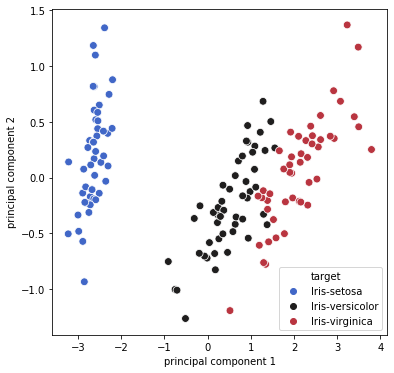

In [16]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_data , x = 'principal component 1',y = 'principal component 2' , hue = 'target' , s = 60 , palette= 'icefire')